# Using NLP for Language Detection

If your application has multilingual users, you will need to know which language they are using when they talk or write. Language detection in Natural Language Processing (NLP) is a computational solution to this issue. Choosing language-specific AI models to process what users say or write allows you to enhance user experience.

### Importing our Libraries

In [1]:
!pip install -r requirements.txt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 
import warnings 
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

### Data Exploration and pre-processing

In [2]:
data = pd.read_csv('Language Detection.csv')

Now, we'd check to see what our data looks like.

In [3]:
df_sample = data.sample(n=5)
df_sample

,Text,Language
5323,si quieres agradecer a alguien puedes decir qu...,Spanish
4549,het is alsof het er niet toe doet.,Dutch
7813,MediaWiki yazılımı kullanılarak hazırlanmaktadır.,Turkish
4604,"dit is een no-brainer, wat betekent dat het ee...",Dutch
9498,.Wir sind alle auf der Suche nach schnellen We...,German


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


There are 10,337 rows in our dataset, None of which are null that's a good thing. But we may want to check for duplicate rows so it doesn't affect our model output. And if they are any we drop them.

In [5]:
len(data[data.duplicated()])

66

In [6]:
data.drop_duplicates(inplace=True)

Now that has been done, let's take more exploratory look at our dataset, this time with visualizations.

In [7]:
data["Language"].nunique()

17

In [8]:
data["Language"].value_counts()

English       1382
French        1007
Spanish        816
Portugeese     736
Italian        694
Russian        688
Sweedish       673
Malayalam      591
Dutch          542
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi           62
Name: Language, dtype: int64

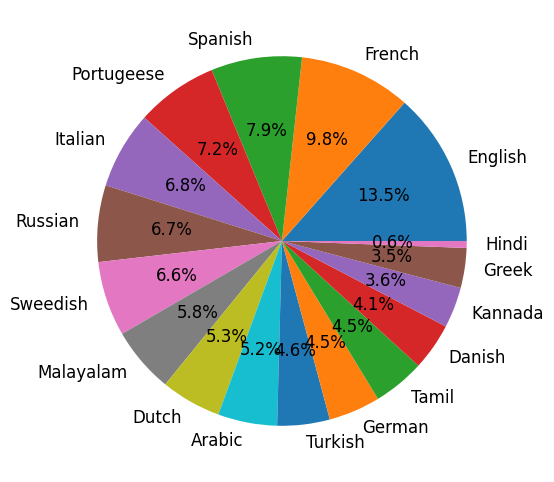

In [9]:
language = data["Language"].value_counts().reset_index()

plt.figure(figsize=(6,6))
labels= language['index']

plt.pie(language["Language"], labels= labels, autopct='%.1f%%', textprops={'fontsize': 12})
plt.show()

Next we would clean our texts across all the rows in our dataset. Cleaning our texts basically entails removing special characters and numbers as well as converting our texts to lower case.

We would write a simple function to do this.

In [10]:
def clean(Text):
  Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', Text)   # removing the symbols and numbers
  Text = Text.lower()   # converting the text to lower case
  Text = re.sub('#\S+', '', Text)  # remove hashtags

  return Text

In [11]:
data["Text"] = data["Text"].apply(lambda x:clean(x))
data

,Text,Language
0,nature in the broadest sense is the natural...,English
1,nature can refer to the phenomena of the phy...,English
2,the study of nature is a large if not the onl...,English
3,although humans are part of nature human acti...,English
4,the word nature is borrowed from the old f...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


### Modelling

Now we seperate our features into Input(Independent) and Output(Dependent) for our model

In [12]:
X = data["Text"]
y = data["Language"]

Our output variable, the name of languages is a categorical variable. For training the model we have to convert it into a numerical variable, so we are performing label encoding on that output variable.

In [13]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

Now we'd do something a bit similar with our input features(X) but we'd use a method called **Bag of words** 

In [14]:
CV = CountVectorizer()
X = CV.fit_transform(X).toarray()

In [15]:
X.shape

(10271, 39404)

Next we create the training set, for training the model and test set, for evaluating the model. For this process, we are using a train test split.

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

After Splitting the dataset we would now create our model. I would use the multinomial naive bayes algorithm, which is usually best suited for model like bag-of-words.

In [17]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

we’ve trained our model using the training set. Now let’s predict the output for the test set.

In [18]:
y_pred = model.predict(x_test)

Now we can evaluate our model

In [19]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy is :",accuracy)

Accuracy is : 0.9776155717761558


The accuracy of the model is 0.97 which is very good and our model is performing well.

### Prediction

Now, were done lets see how our model performs on new text.

In [20]:
# function for predicting language
def predict(text):
    x = CV.transform([text]).toarray()
    lang = model.predict(x)
    lang = encoder.inverse_transform(lang)
    print("The langauge is in",lang[0])

In [21]:
# English
predict("Fellowship AI gives aspiring machine learning engineers the chance to hone their skills by building real-world applications.")

The langauge is in English


In [22]:
# Spanish
predict("Fellowship AI brinda a los aspirantes a ingenieros de aprendizaje automático la oportunidad de perfeccionar sus habilidades mediante la creación de aplicaciones del mundo real")

The langauge is in Spanish


In [23]:
#Arabic
predict("Fellowship AI يمنح مهندسي التعلم الآلي الطموحين الفرصة لصقل مهاراتهم من خلال إنشاء تطبيقات واقعية")


The langauge is in Arabic


In [24]:
#Portuguese
predict("A Fellowship AI oferece aos aspirantes a engenheiros de aprendizado de máquina a chance de aprimorar suas habilidades criando aplicativos do mundo real")

The langauge is in Portugeese


In [25]:
# Greek
predict("Το Fellowship AI δίνει στους επίδοξους μηχανικούς μηχανικής μάθησης την ευκαιρία να βελτιώσουν τις δεξιότητές τους δημιουργώντας εφαρμογές πραγματικού κόσμου")

The langauge is in Greek


### Deployment

To deploy our model into "production" we would build a simple streamlit application interface that lets us paste text or attach an image to predict what language is present in the given data. 

First we'd pickle our model and save it as a file so we can use it later, before we proceed to build our streamlit interface.

In [26]:
import pickle

pickle.dump(model, open('LD.model','wb'))
pickle.dump(CV, open("vectorizer.pickle", "wb"))
pickle.dump(encoder, open("encoder.pickle", "wb"))

In [23]:
import pickle

CV = pickle.load(open('vectorizer.pickle','rb'))
X = CV.transform(["Το Fellowship AI δίνει στους επίδοξους μηχανικούς μηχανικής μάθησης την ευκαιρία να βελτιώσουν τις δεξιότητές τους δημιουργώντας εφαρμογές πραγματικού κόσμου"]).toarray()

X

array([[0, 0, 0, ..., 0, 0, 0]])

In [30]:
%%writefile /home/davidoden/Documents/Language-Detector-App/LDAPP.py

# Importing Dependencies
import os
import glob
import streamlit as st
from easyocr import Reader
import pickle

def main():
  """Main function, Default calls to home page"""
  st.title("Language Detector Application")
  menu = ["Home","About"]
  choice = st.sidebar.selectbox("Menu",menu)

  if choice == "Home":
    st.subheader("Detect what language is in a text or on an image.")
    st.markdown("<p style='font-size:12px;'></p>\n<b>Select an option to begin.</b>", unsafe_allow_html=True)

    options = st.radio(
    "What's your favorite movie genre",
    ('Text', 'Image'))

    # Image to text model
    reader_lang = Reader(['en', 'fr'])
    # Language recognizer model
    model = pickle.load(open('LD.model','rb'))
    CV = pickle.load(open('vectorizer.pickle','rb'))
    encoder = pickle.load(open('encoder.pickle','rb'))

    # function for predicting language
    def predict(text):
        x = CV.transform([text]).toarray()
        lang = model.predict(x)
        lang = encoder.inverse_transform(lang)
    
        st.write('The language in the above text is', lang[0])

    if options == 'Text':
        text = st.text_area('Text to analyze','''''')

        if st.button(label="Detect"):
            predict(text)
        
    else:
        # Upload Image
        uploaded_file = st.file_uploader("Upload a file", type=['.png','.jpg'])
        if uploaded_file is not None:
            # To read file as bytes:
            with open(os.path.join("/home/davidoden/Documents/Language-Detector-App/Images/",uploaded_file.name),"wb") as f: 
                f.write(uploaded_file.getbuffer())
            
            #image path
            path = "/home/davidoden/Documents/Language-Detector-App/Images/"+uploaded_file.name
             # Read the data
            text = reader_lang.readtext(path, detail = 0, paragraph=True)
            
            if st.button(label="Detect"):
                predict(text)
            


if __name__ == '__main__':
    main()

Overwriting /home/davidoden/Documents/Language-Detector-App/LDAPP.py
